In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("income.csv")
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [4]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

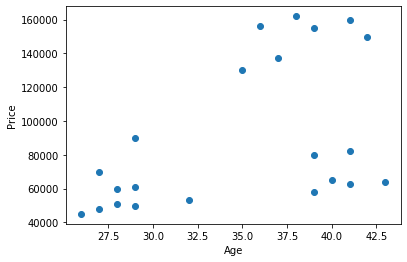

In [6]:
plt.scatter(df[["Age"]],df[['Income($)']])
plt.xlabel("Age")
plt.ylabel("Price")

In [9]:
#Data Preprocessing

In [11]:
# Check Missing Values-1
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [13]:
#Data-Scalling
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [16]:
scaler.fit(df[['Age']])
df[['Age']]=scaler.transform(df[['Age']])

In [18]:
scaler.fit(df[['Income($)']])
df[['Income($)']]=scaler.transform(df[['Income($)']])

In [19]:
df.head(3)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752


Text(0, 0.5, 'Price')

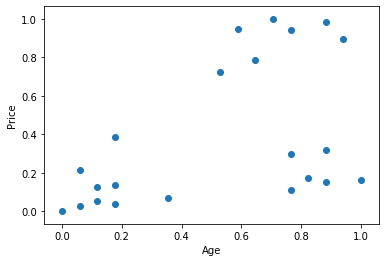

In [20]:
plt.scatter(df[["Age"]],df[['Income($)']])
plt.xlabel("Age")
plt.ylabel("Price")

In [61]:
#Eblow Method -Best K-Mean value 
sse=[]
k_range=[2,3,4,5,6,7,8,9,10]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)    

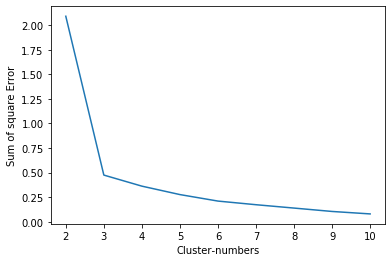

In [62]:
plt.xlabel('Cluster-numbers')
plt.ylabel('Sum of square Error')
plt.plot(k_range,sse)

In [ ]:
# Eblow Method; gives the required value=3 ( as elbow points is visal)

In [21]:
# model building
from sklearn.cluster import KMeans

In [23]:
km=KMeans(n_clusters=3) # object creation 

In [26]:
km.fit_predict(df[['Age','Income($)']]) # fit & predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [28]:
y_predict=km.fit_predict(df[['Age','Income($)']]) # store in object

In [29]:
df['cluster']=y_predict #create new column

In [30]:
df.head(3)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1


In [31]:
km.cluster_centers_ #centriod-clusters

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

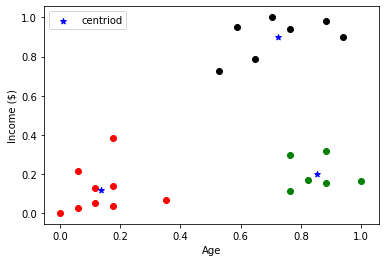

In [54]:
# Visualization
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='blue', label='centriod')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()